<div style="color: orange">

# Formalne metode u softverskom inženjerstvu
## Laboratorijska vježba br. 3</div>

U ovoj laboratorijskoj vježbi upoznaćemo se sa:
 - `sympy` bibliotekom za simboličko izračunavanje.
 - LaTeX/MathJax notacijom za matematičke izraze.
 - Analizom apsolutnih i relativnih grešaka predikcije.
 - Amortizovanom analizom algoritama.

<div style="color: orange">

### Priprema </div>

Podesiti Python okruženje i instalirati `sympy` biblioteku.

<div style="color: orange">

### Sympy </div>

Sympy je Python biblioteka za simboličko izračunavanje.

In [1]:
import sympy
from sympy import log

# Definišemo simbole
x, y = sympy.symbols('x y')

# Definišemo izraz
expression = x**2 + 2*x + (log(x))**2 + 1

# Ispisujemo izraz
print(expression)

x**2 + 2*x + log(x)**2 + 1


In [2]:
# Prikazujemo izraz u LaTeX (MathJax) notaciji
from IPython.display import Math, display
print(sympy.latex(expression))
display(Math(sympy.latex(expression)))

x^{2} + 2 x + \log{\left(x \right)}^{2} + 1


<IPython.core.display.Math object>

Trebalo bi biti ispisano:

$$x^{2} + 2 x + \log{\left(x \right)}^{2} + 1$$

Ovdje se za izraze koristi MathJax sintaksa, koja je podskup LaTeX sintakse za matematičke izraze. Matematički izrazi se mogu u Markdown tekstu navesti u obliku \$izraz\$ za inline izraze, odnosno \$\$izraz\$\$ za izraze u novom redu.

In [3]:
# Moguće je i parsirati string
expr = 'x**2 + 2*x + (log(x))**2 + 1'
expr = sympy.sympify(expr)
print(expr)

x**2 + 2*x + log(x)**2 + 1


In [4]:
# Izrazi se mogu porediti po jednakosti
expr1 = x**2 + 2*x + log(x) + 1
expr2 = 1 + 2 * x + x**2 + log(x)
print(expr1 == expr2)

True


In [5]:
# Primjer: izračunavamo izvod izraza po x
expr = 'x**2 + 2*x + log(x) + 1'
sympy.diff(expr, x)

2*x + 2 + 1/x

<div style="color: orange">

### Zadaci </div>

Korištenjem funkcije `run_algorithm_analysis`, definisane ispod, analizirati algoritme u ovoj sekciji.

In [6]:
def run_algorithm_analysis(func, model, train_arg, test_args):
    '''
    Function to analyze the performance of an algorithm using a given model.
    This function measures the time taken by the algorithm for a training argument,
    estimates the parameters of the model, and then predicts the time for a list of test arguments.
    It also computes absolute and relative errors between the measured and predicted times.
    Finally, it plots the measured times, predicted times, absolute errors, and relative errors.
    The model should be a string representation of a mathematical expression in terms of 'n'.
    The function uses Sympy for symbolic computation and Matplotlib for plotting.
    
    Parameters:
        func: the function to be analyzed (should take a single argument)
        model: a string representation of the model (e.g. 'n**2')
        train_arg: the argument for the training phase (should be a number)
        test_args: a list of arguments for the testing phase (should be a list of numbers)
    '''
    def time_function(func, n):
        import time
        start_time = time.time()
        func(n)
        end_time = time.time()

        return end_time - start_time
    
    model = sympy.sympify(model)
    
    # Estimate parameter of the model
    measured_times_training = []
    for i in range(0, 10):
        measured_times_training.append(time_function(func, train_arg))

    # Take the average of the last 3 measurements
    measured_times_training.sort()
    measured_times_training = measured_times_training[-3:]
    final_measured_time = sum(measured_times_training) / len(measured_times_training)

    # Estimate parameter - subs substitutes 'n' in the model with the training argument, evalf computes the value
    estimated_parameter = final_measured_time / model.subs('n', train_arg).evalf()
    trained_model = estimated_parameter * model

    # Measure the time for the test arguments
    measured_times_test = []
    for arg in test_args:
        measured_times_test.append(time_function(func, arg))

    # Predict the times using the model
    predicted_times = []
    for arg in test_args:
        predicted_times.append(trained_model.subs('n', arg).evalf())

    # Compute absolute errors
    absolute_errors = []
    for i in range(len(measured_times_test) // 2, len(measured_times_test)):
        absolute_errors.append(abs(measured_times_test[i] - predicted_times[i]))

    # Compute relative errors
    relative_errors = []
    for i in range(len(measured_times_test) // 2, len(measured_times_test)):
        relative_errors.append(abs(measured_times_test[i] - predicted_times[i]) / measured_times_test[i])

    # Plotting
    import matplotlib.pyplot as plt

    # Set up the figure
    plt.clf()
    plt.figure(figsize=(18,4))

    # Plot measured times vs predicted times
    plt.subplot(1, 3, 1)
    plt.plot(test_args, measured_times_test, label='Measured Times', marker='o')
    plt.plot(test_args, predicted_times, label='Predicted Times', marker='x')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (s)')
    plt.title('Algorithm Performance Analysis')
    plt.legend()

    # Plot absolute errors
    plt.subplot(1, 3, 2)
    plt.plot(test_args[len(measured_times_test) // 2:], absolute_errors, label='Absolute Errors', marker='o')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Absolute Error (s)')
    plt.title('Absolute Errors')

    # Plot relative errors
    plt.subplot(1, 3, 3)
    plt.plot(test_args[len(measured_times_test) // 2:], relative_errors, label='Relative Errors', marker='o')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Relative Error')
    plt.title('Relative Errors')

    # Show the plots
    plt.show()

1.

<Figure size 640x480 with 0 Axes>

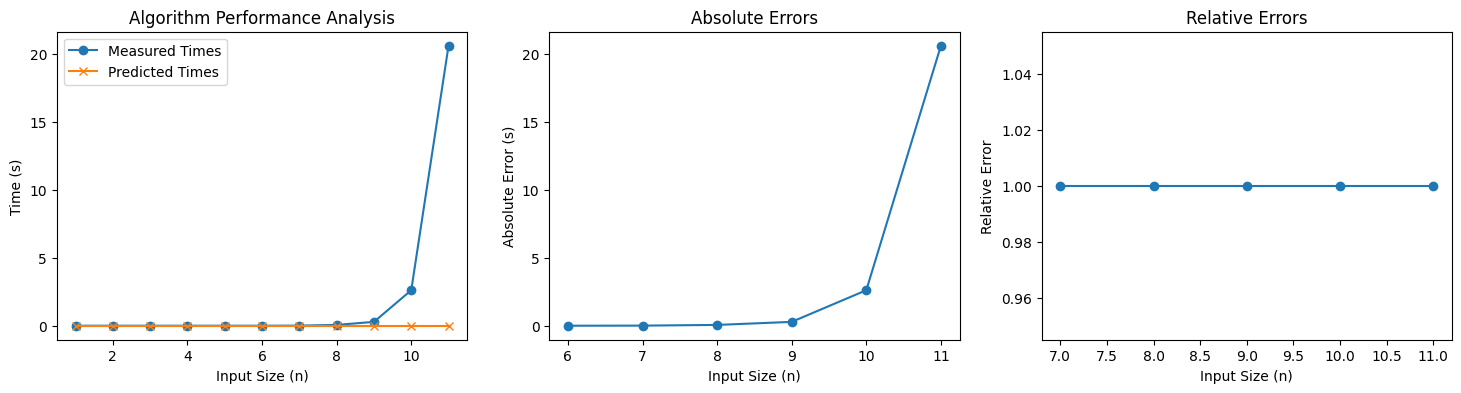

In [27]:
def a(n):
    x = 0
    for i in range(0, n):
        x += a(n-1)
    return x

# TODO Odrediti model i adekvatne argumente. [NAPOMENA: Uobičajena praksa je obrisati TODO komentar nakon što se TODO stavka završi.]
run_algorithm_analysis(a, 'n!', 1, [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11])


<details style="color: orange"><summary><b>Rješenje.</b></summary>

Neka je $c(n)$ broj koraka izračunavanja algoritma `a(n)`. Možemo $c(n)$ izraziti preko rekurzivne jednakosti:

$$c(n) = nc(n-1)\text{,}$$

s tim da za bazni slučaj rekurzije možemo uzeti $c(1) = 1$.

Prema ovome:

$c(2) = 2\cdot1$

$c(3) = 3\cdot2\cdot1$

$\vdots$

$c(n) = n\cdot(n-1)\cdot\ldots\cdot2\cdot1 = n!$

$c(n+1) = (n+1)\cdot n! = (n+1)!$

</details>


2.

<Figure size 640x480 with 0 Axes>

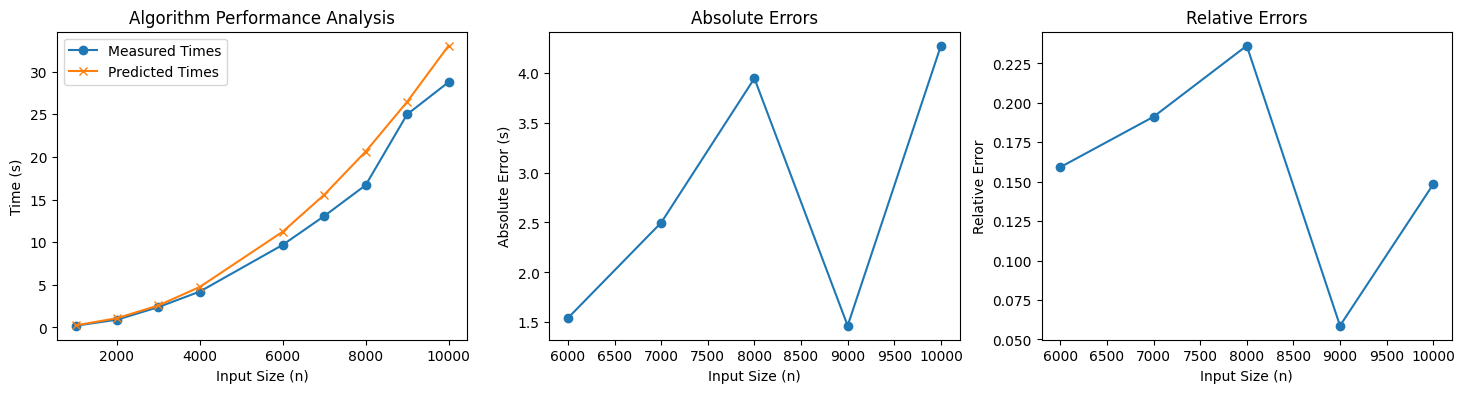

In [13]:
def a(n):
    import math
    x = 0
    for i in range(0, n):
        x += 1
    for i in range(0, n*n):
        x += 1
    # log n
    for i in range(0, n*n*int(math.log(n))):
        x += 1
    return x

# TODO Odrediti model
run_algorithm_analysis(a, model='n**2*log(n)', train_arg=5000, test_args=[1000, 2000, 3000, 4000, 6000, 7000, 8000, 9000, 10000])

3.

<Figure size 640x480 with 0 Axes>

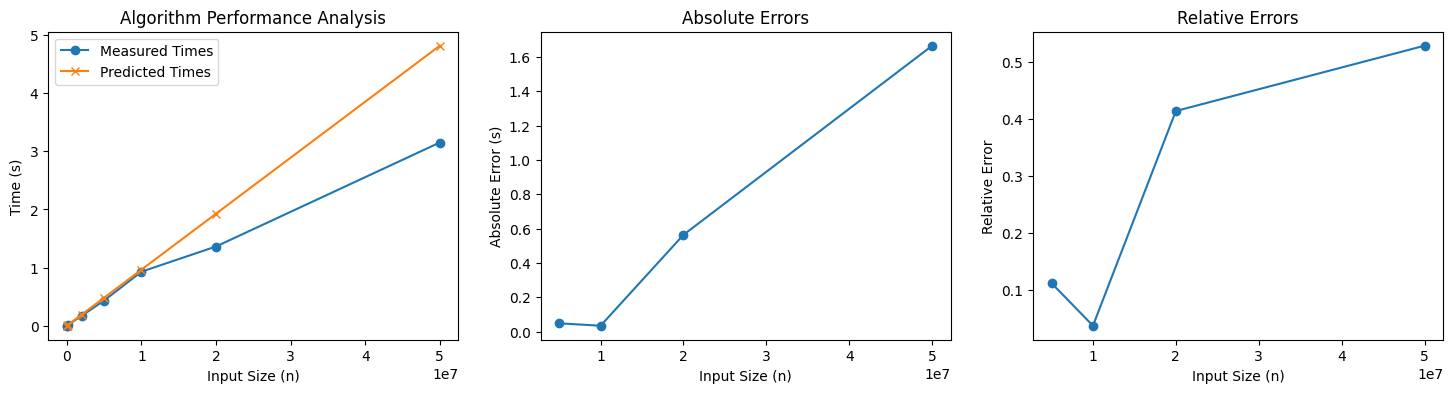

In [23]:
def a(n):
    j = 0
    while n > 0:
        j += b(n)
        n = n // 2
    return j

def b(n):
    j = 0
    for i in range(0, n):
        j += 1
    return j

# TODO Odrediti model. Utvrditi šta se dešava ako se koristi pogrešna funkcija.
run_algorithm_analysis(a, model='n', train_arg=1000000, test_args=[1000, 10000, 100000, 2000000, 5000000, 10000000, 20000000, 50000000])

<details style="color: orange"><summary><b>Pomoć pri rješavanju.</b></summary>

Neka je $c_f(n)$ broj koraka izračunavanja algoritma `f(n)`. Možemo $c_a(n)$ izraziti preko jednakosti:

$$c_a(n) = c_b(n) + c_b(\frac{n}{2}) + \ldots + c_b(\frac{n}{2^{\log(n)}})\text{.}$$

</details>

4.

<Figure size 640x480 with 0 Axes>

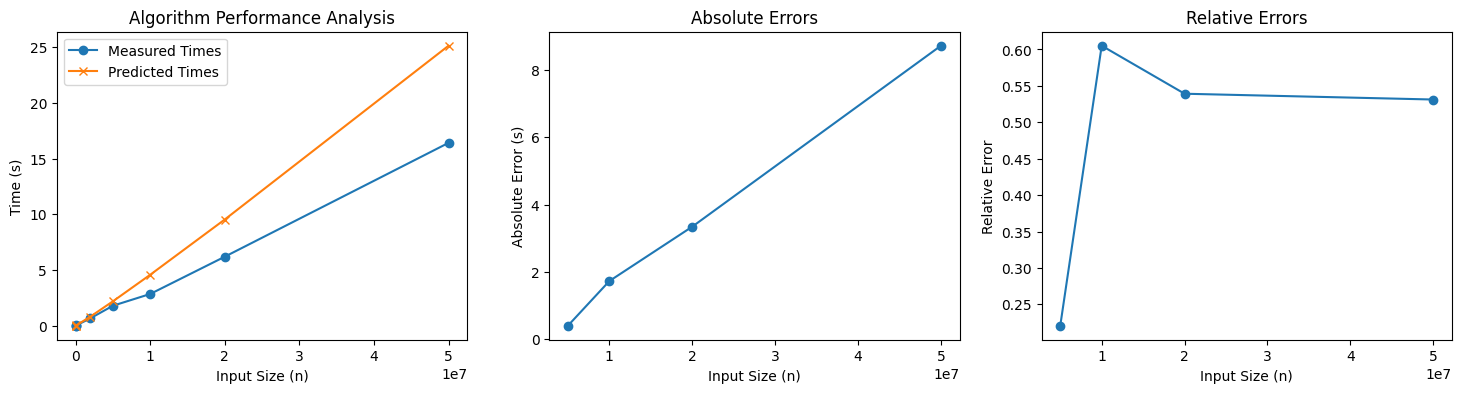

In [25]:
def a(n):
    c = b(n)
    for i in range(0, c):
        for k in range(0, n):
            pass
    return c

def b(n):
    i = 0
    j = 0
    while n > 0:
        i = i + 1
        n = n // 2
    for k in range(0, n):
        j = j + 1
    return i

# TODO Odrediti model. Utvrditi šta se dešava ako se koristi pogrešna funkcija.
run_algorithm_analysis(a, model='n*log(n)', train_arg=1000000, test_args=[1000, 10000, 100000, 2000000, 5000000, 10000000, 20000000, 50000000])

<details style="color: orange"><summary><b>Pomoć pri rješavanju.</b></summary>

Obratiti pažnju na to šta `b(n)` izračunava. NAPOMENA: Ne dovoditi u zabunu broj koraka izračunavanja sa rezultatom izračunavanja!

</details>

<div style="color: orange">

### Amortizovana analiza</div>

Nekada je korisno razmatrati i prosječan broj koraka izračunavanja algoritma s obzirom na neki slučaj upotrebe. Demonstriraćemo još i tzv. amortizovanu analizu algoritama.

In [26]:
def a(n):
    c = 0
    # Provjeravamo da li je n stepen broja 2
    if ((n & (~(n - 1))) == n):
        for i in range(0, n):
            c += 1
    else:
        c = 1
    return c

Imamo da je algoritam u $O(n)$.

Neka je $c(n)$ broj koraka izračunavanja algoritma `a(n)`.

Možemo uočiti da važi
$$c(n)=\begin{cases}
    n\text{,} & (\exists k\in\mathbb{N}) \;\; n=2^k  \\ % & is your "\tab"-like command (it's a tab alignment character)
    1\text{,} & \text{inače.}
\end{cases}$$


Razmatrajmo funkciju
$$\tilde{c}(n)=\frac{1}{n}\sum_{i=1}^{n}{c(i)}$$
koja predstavlja broj koraka izračunavanja kada se funkcija uzastopno poziva $n$ puta sa inkrementirajućim argumentom.



Možemo uočiti da je 
$$\sum_{i=1}^{n}{c(i)} \leq n + \left(n + \frac{n}{2} + \frac{n}{4} + \ldots + \frac{n}{2^{\lceil{\log{n}}\rceil}}\right) = n + \sum_{j=0}^{\lceil\log{n}\rceil}{\frac{n}{2^j}} = n\left(1 + \sum_{j=0}^{\lceil\log{n}\rceil}{\frac{1}{2^j}}\right) \leq n \left(1 + 2\right) = 3n $$

Prema tome,

$$0 \lt \tilde{c}(n)=\frac{1}{n}\sum_{i=1}^{n}{c(i)} \leq 3\text{,}$$

tj. 

$$\tilde{c}(n) \in O(1)\text{.}$$

Dakle, za slučaj izvršavanja algoritma gdje se on poziva više puta, svaki put sa inkrementovanim argumentom u odnosu na zadnji put, važi da je prosječna kompleksnost (prosječan broj koraka izračunavanja) u $O(1)$. Ovo je korisno npr. za utvrđivanje prosječnog vremena dodavanja elemenata u dinamički niz sa efikasnom realokacijom. Zato smo i ranije udvostručavali kapacitet niza (na primjerima iz C++-a) kada se on popuni - jer da smo svaki put nakon dodavanja elementa vršili realokaciju onda bi prosječna kompleksnost bila $O(n)$, što znači da to ne bi bio efikasan pristup.

<div style="color: orange">

### Zaključak</div>

U ovoj laboratorijskoj vježbi upoznali smo se sa:
 - `sympy` bibliotekom za simboličko izračunavanje.
 - LaTeX/MathJax notacijom za matematičke izraze.
 - Analizom apsolutnih i relativnih grešaka predikcije.
 - Amortizovanom analizom.

Zaključili smo da postoje i biblioteke, kao što je `sympy`, koje mogu da direktno upravljaju sa matematičkim simbolima u izrazima, pored biblioteka koje vrše numeričke operacije, kao što je `numpy`. Utvrdili smo da relativna greška matematičkih modela vremena izvršavanja algoritma bi trebalo da opada s porastom veličine ulaza, čak iako se apsolutna greška povećava. Razmotrili smo i amortizovanu analizu koja je korisna za algoritme kod kojih se u praksi kompleksnost često pokazuje nižom od najgore moguće kompleksnosti tog algoritma.